# Feature Engineering in Python 

## Module 1: Importing and processing the data

In this module you will learn how to load the dataset in Python and perform certain data cleaning operations and how to handle missing data


### Learning Activity: Loading the Python libraries

First you need to load the required Python libraries. Libraries are extensions to the base python that add functionality or help to make tasks more convenient to do. 

In [126]:
# numerical capacity
import scipy as scipy
import numpy as np
import pandas as pd
# preprocessing module from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

### Learning Activity: Reading dataset from csv files
You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.
We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [7]:
broken_df = pd.read_csv('data/bikes.csv')

In [8]:
# Look at the first 3 rows
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


In [148]:
# Fixing the encoding and parsing problems by adding extra options

fixed_df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [11]:
# Look at the first 3 rows
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [37]:
# Look at the data
fixed_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [38]:
# Full description of the rows
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [18]:
# Selecting a column
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

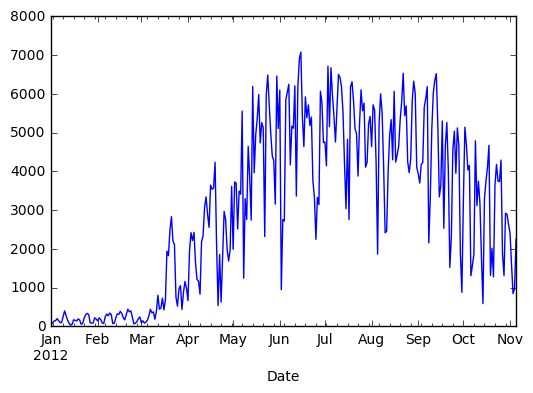

In [25]:
# Plotting a column

%matplotlib inline
fixed_df['Berri 1'].plot()

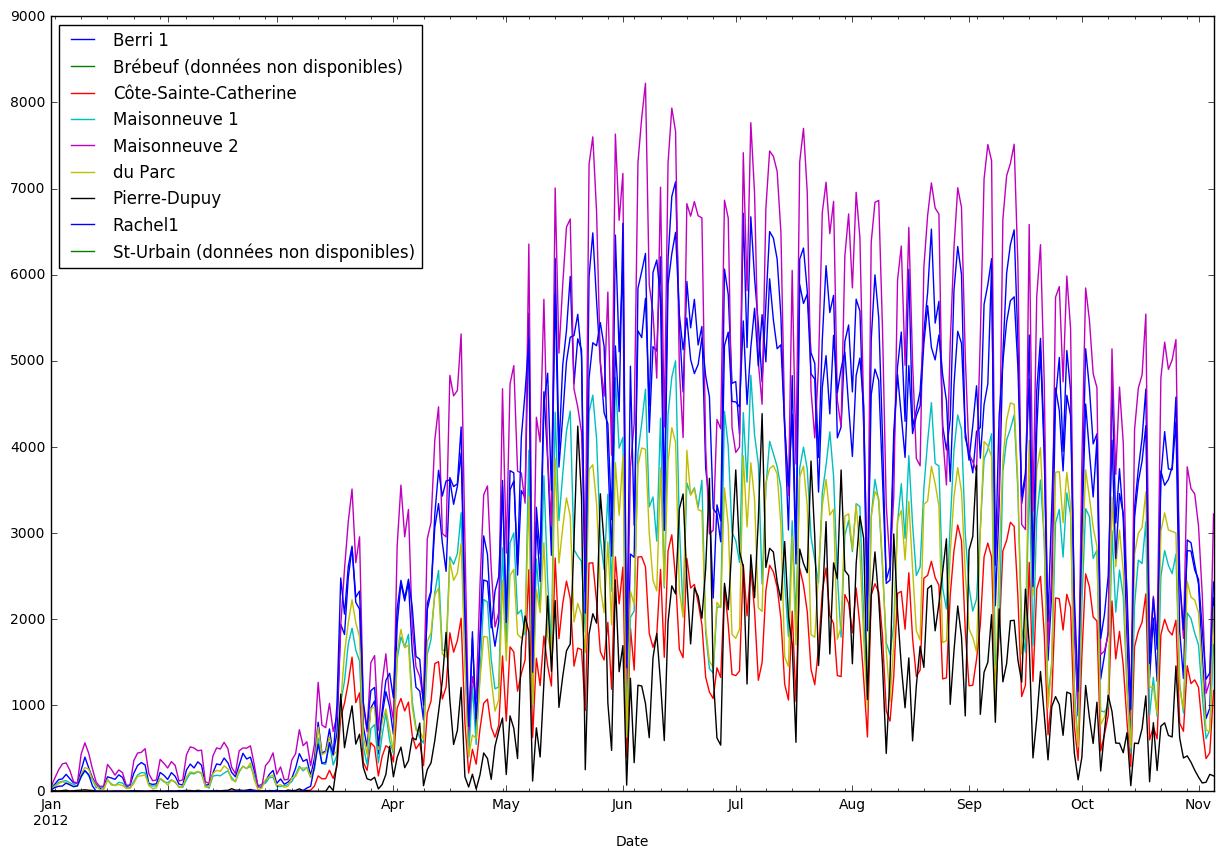

In [27]:
# Plotting several columns

fixed_df.plot(figsize=(15, 10))

### Learning Activity: Replacing missing values in pandas
The fillna function can “fill in” NA values with non-null data in a couple of ways

In [137]:
# Replace NA with a scalar value

fixed_df.fillna(0)[:3]


,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,0.0,0,38,51,26,10,16,0.0
2012-01-02,83,0.0,1,68,153,53,6,43,0.0
2012-01-03,135,0.0,2,104,248,89,3,58,0.0


In [149]:
# Fill gaps forward or backward
fixed_df[fixed_df.columns[1]][0] = 4
fixed_df.fillna(method='pad')[:3]

C:\Users\Osman\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,4.0,0,38,51,26,10,16,NaN
2012-01-02,83,4.0,1,68,153,53,6,43,NaN
2012-01-03,135,4.0,2,104,248,89,3,58,NaN


In [151]:
fixed_df.fillna(fixed_df.mean())

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,4.0,0,38,51,26,10,16,NaN
2012-01-02,83,4.0,1,68,153,53,6,43,NaN
2012-01-03,135,4.0,2,104,248,89,3,58,NaN
2012-01-04,144,4.0,1,116,318,111,8,61,NaN
2012-01-05,197,4.0,2,124,330,97,13,95,NaN
2012-01-06,146,4.0,0,98,244,86,4,75,NaN
2012-01-07,98,4.0,2,80,108,53,6,54,NaN
2012-01-08,95,4.0,1,62,98,64,11,63,NaN
2012-01-09,244,4.0,2,165,432,198,12,173,NaN


In [153]:
# Saving the resulting dataframe as csv file
fixed_df.to_csv("out.csv", encoding='latin1')

### Learning Activity: Standardization, or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.


In [43]:
# Define the following the numpy array
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

# Apply the standard scaling function
X_scaled = preprocessing.scale(X)


X_scaled


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [69]:
# Find the mean and the standard deviation of the original and scaled version

print(X.mean(axis=0))
print(X_scaled.mean(axis=0))
print("\n")
print(X.std(axis=0))
print(X_scaled.std(axis=0))


[ 1.          0.          0.33333333]
[ 0.  0.  0.]


[ 0.81649658  0.81649658  1.24721913]
[ 1.  1.  1.]


The `preprocessing` module further provides a utility class [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) that implements the `Transformer` API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. This class is hence suitable for use in the early steps of a `sklearn.pipeline.Pipeline`:

In [42]:
# Create a StandardScaler object and fit it with the data
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
# Print scaler attributes
print(scaler.mean_)
print(scaler.scale_)

[ 1.          0.          0.33333333]
[ 0.81649658  0.81649658  1.24721913]


In [65]:
# Transform the data using the scaler
print(X)
print("\n")
print(scaler.transform(X))

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]


[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [49]:
# Scale the new data by using the transformer
scaler.transform([[-1., 1., 0.]])

array([[-2.44948974,  1.22474487, -0.26726124]])

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using [`MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) or [`MaxAbsScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler), respectively.
The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.
Here is an example to scale a toy data matrix to the `[0, 1]` range:

In [50]:
# Create a MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [55]:
# Fit the scaler to the data and use it to transform it
min_max_scaler.fit_transform(X)

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

In [58]:
# Show the scaler attributes
print(min_max_scaler.scale_)
print(min_max_scaler.min_)

[ 0.5         0.5         0.33333333]
[ 0.          0.5         0.33333333]


In [56]:
# Create a MaxAbsScaler
max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_scaler

MaxAbsScaler(copy=True)

In [57]:
# Fit the scaler to the data and use it to transform it
max_abs_scaler.fit_transform(X)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [70]:
# Using minmax_scale function instead
preprocessing.minmax_scale(X)

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

### Learning Activity: Normalization

**Normalization** is the **process of scaling individual samples to have unit norm**. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.


In [81]:
# Define an array X
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
print(X)

print("\n")

# Normalise the array using l1 norm
print(preprocessing.normalize(X, norm='l1'))

print("\n")

# Normalise the array using l2 norm
print(preprocessing.normalize(X, norm='l2'))


[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]


[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]


[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


The `preprocessing` module further provides a utility class `Normalizer` that implements the same operation using the `Transformer` API (even though the `fit` method is useless in this case: the class is stateless as this operation treats samples independently).

In [82]:
# Create a normalizer object and fit it with the data
normalizer = preprocessing.Normalizer().fit(X)
normalizer

Normalizer(copy=True, norm='l2')

In [83]:
# Use the normalizer to normalize the data
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### Learning Activity: Binarization

**Feature binarization** is the process of **thresholding numerical features to get boolean values**. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution). For instance, this is the case for the [`sklearn.neural_network.BernoulliRBM`](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html#sklearn.neural_network.BernoulliRBM).

It is also common among the text processing community to use binary feature values (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.


As for the `Normalizer`, the utility class `Binarizer` is meant to be used in the early stages of `sklearn.pipeline.Pipeline`. The `fit` method does nothing as each sample is treated independently of others:

In [84]:
# Define an array X
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
print(X)

print("\n")

# Create a binarizer object and fit it with the data
binarizer = preprocessing.Binarizer().fit(X)
binarizer

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]




Binarizer(copy=True, threshold=0.0)

In [85]:
# Use the binarizer to transform thhe data
binarizer.transform(X)

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

### Learning Activity: Encoding categorical features

Often features are not given as continuous values but categorical. For example a person could have features `["male", "female"]`, `["from Europe", "from US", "from Asia"]`, `["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]`. Such features can be efficiently coded as integers, for instance `["male", "from US", "uses Internet Explorer"]` could be expressed as `[0, 1, 3]` while `["female", "from Asia", "uses Chrome"]` would be `[1, 2, 1]`.

Such integer representation can not be used directly with scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

One possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K or one-hot encoding, which is implemented in [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). This estimator transforms each categorical feature with `m` possible values into `m` binary features, with only one active.

In [98]:
# Create LabelEncoders and fit them the the data
categories = [["male", "female"],
 ["from Europe", "from US", "from Asia"],
 ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]]

les = [preprocessing.LabelEncoder().fit(category) for category in categories]
# Print the different classes of the encoders
[le.classes_ for le in les]

[array(['female', 'male'], 
       dtype='|S6'), array(['from Asia', 'from Europe', 'from US'], 
       dtype='|S11'), array(['uses Chrome', 'uses Firefox', 'uses Internet Explorer',
        'uses Safari'], 
       dtype='|S22')]

In [101]:
# Transform the categories using the encoders
cats = ["male", "from US", "uses Internet Explorer"]
[le.transform([cat])[0] for (cat, le) in zip(cats, les)]

[1, 2, 2]

In [102]:
# Create a OneHotEncoder and fit it with the data
enc = preprocessing.OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 

OneHotEncoder(categorical_features='all', dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [104]:
# Transform the data using the encoder
enc.transform([[0, 1, 3]]).toarray()

array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

By default, how many values each feature can take is inferred automatically from the dataset. It is possible to specify this explicitly using the parameter `n_values`. There are two genders, three possible continents and four web browsers in our dataset. Then we fit the estimator, and transform a data point. In the result, the first two numbers encode the gender, the next set of three numbers the continent and the last four the web browser.

In [111]:
# OnHotEncoder for missing categorical features
enc = preprocessing.OneHotEncoder(n_values=[2, 3, 4])
# Note that there are missing categorical values for the 2nd and 3rd
# features
enc.fit([[1, 2, 3], [0, 2, 0]])  


enc.transform([[1, 0, 0]]).toarray()

array([[ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.]])

### Learning Activity: Imputation of missing values

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.

The `Imputer` class provides basic strategies for imputing missing values, either using the mean, the median or the most frequent value of the row or column in which the missing values are located. This class also allows for different missing values encodings.

In [115]:
# Replacing missing values with the mean value of the columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [116]:
# Print the replaced values
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))                           


[[ 4.          2.        ]
 [ 6.          3.66666667]
 [ 7.          6.        ]]


### Learning Activity: Generating ploynomial features

Often it’s useful to add complexity to the model by considering nonlinear features of the input data. A simple and common method to use is polynomial features, which can get features’ high-order and interaction terms. It is implemented in `PolynomialFeatures`:

In [124]:
# Add transform (x1,x2) to (1, x1, x2, x1^2, x1x2, x2^2)
X = np.arange(6).reshape(3, 2)
print(X)
poly = PolynomialFeatures(2)
print(poly)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]
PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)


array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

### Learning Activity: Custom transformers

Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing. You can implement a transformer from an arbitrary function with `FunctionTransformer`. For example, to build a transformer that applies a log transformation in a pipeline, do:

In [127]:
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[ 0.        ,  0.69314718],
       [ 1.09861229,  1.38629436]])

## Module 2: Visualising the data

In this module you will learn how to visualise the dataset using different plots to produce insights that will guide your machine learning endevours in the next modules

### Learning Activity: Loading the Python libraries

First you need to load the required Python libraries. Libraries are extensions to the base python that add functionality or help to make tasks more convenient to do. 


In [132]:
# plotly setup
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()

### Learning Activity: Using boxplots to visualise the effect of the features

[Boxplot](https://plot.ly/python/box-plots/) is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

In [157]:
# Load the bike.csv dataset
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
header = df.columns.values
X = np.array(df)

In [159]:
# Plot boxplot
nrow, ncol = df.shape
data = [Box(
            y=X[:,i],
            name=header[i],
            marker=dict(color="red"),)
       for i in range(ncol)]
layout = Layout(
                xaxis=dict(title="Feature"),
                yaxis=dict(title="Value"),
                showlegend=False,)
fig = dict(data=data, layout=layout)
iplot(fig)

### Learning Activity: Using scatter to visualise the relation between the features

[Scatter plots](https://plot.ly/python/line-and-scatter/) are similar to line graphs in that they use horizontal and vertical axes to plot data points. However, they have a very specific purpose. Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation 

In [164]:
# Plot a 2D scatter
data = [Scatter(
        x=X[:,0],
        y=X[:,4],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title=header[0]),
                yaxis=dict(title=header[4]),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [167]:
# Plot a 3D scatter
data = [Scatter3d(
        x=X[:,0],
        y=X[:,4],
        z=X[:,3],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="green",
                    symbol="cross"))]
layout = Layout(
                scene=Scene(
                xaxis=dict(title=header[0]),
                yaxis=dict(title=header[4]),
                zaxis=dict(title=header[3])),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

### Learning Activity: Using Histogram to visualise the frequency of data

A [histogram](https://plot.ly/python/histograms)  is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data.

In [180]:
# Plot a Histogram of the Maisonneuve 1 route (3)
data = [Histogram(
                  x = X[:,3],
                  marker=dict(color="red"),
                  autobinx=False,
                  xbins=dict(
                    start=0,
                    end=5000,
                    size=100
                ))]
layout = Layout(
                xaxis=dict(title="Value"),
                yaxis=dict(title="Count"),
                )
fig = dict(data=data, layout=layout)
iplot(fig)

### Learning Activity: Using Heatmaps to visualise data matrix
A [heatmap](https://plot.ly/python/heatmaps/) is a graphical representation of data where the individual values contained in a matrix are represented as colors. Fractal maps and tree maps both often use a similar system of color-coding to represent the values taken by a variable in a hierarchy.

In [192]:
# Plot a heatmap
data = df.index.date
data = [
    Heatmap(
        z=X[:5,2:],
        x=header[2:],
        y=data[:5]
    )
]
iplot(data)